# Crime in Seattle

Aggregate car theft decreases over the course of the summer, mostly happend during the night (7PM-1AM) and are most likely to happen in districts B, J, N, Q, R and U.

### Aggregate car theft

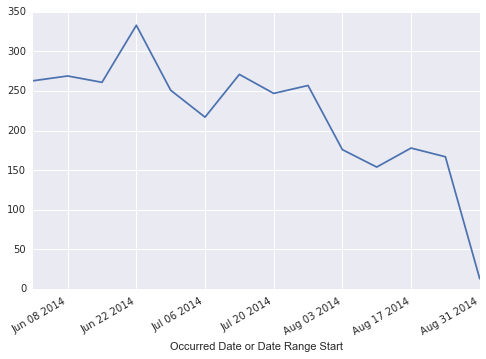

In [86]:
car_theft_.resample('7D').size().plot();

Aggregate car theft has a downward trend over the course of the summer. Car theft in most of the city districts has a downward trend which results in the overall downturn.

### Car theft by district in summertime

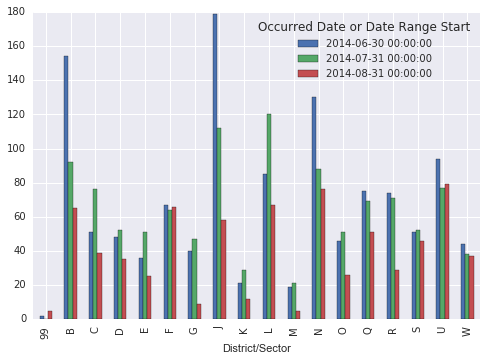

In [87]:
car_theft_.groupby([pd.TimeGrouper('1M'), 'District/Sector']).size().unstack().transpose().plot(kind='bar');

Districts B, J, N, Q, R and U have the largest amount of car theft and the largest drop in subsequent months that explains the overall downturn. The districts with smaller number of reported car thefts do not have a consisntent trend. However in all cases (except for district 99) June has a higher number of thefts vs. August.

### Car theft occurence by hour

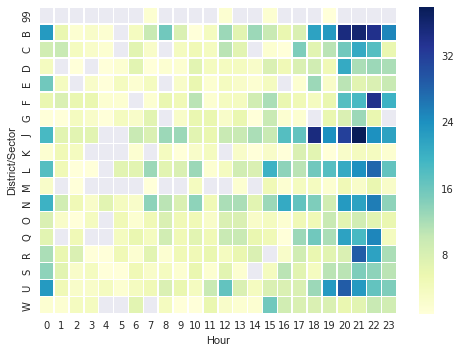

In [90]:
sns.heatmap(x, linewidths=.5, cmap="YlGnBu");

Most of the car thefts are reported during night (7PM-1AM). Some of the theft also seems to be reported early in the morning (7AM-9AM) which makes sense as people wake up and discover their car missing.

# Code for wrangling and displaying data

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/amirziai/datasci_course_materials/assignment6/seattle_incidents_summer_2014.csv')

/Users/amirziai/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2709: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(32779, 19)

In [5]:
df.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


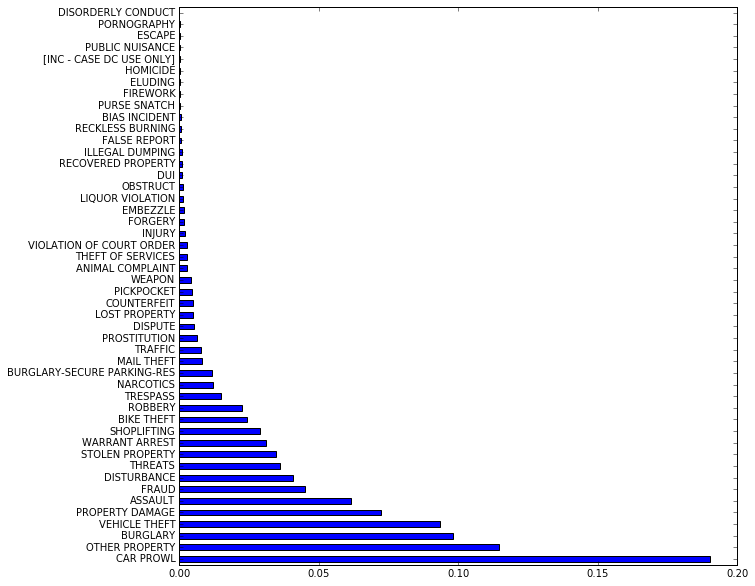

In [6]:
crime_type = 'Summarized Offense Description'
df[crime_type].value_counts(normalize=True).plot(kind='barh', figsize=(10, 10))

In [7]:
# convert object to datetime type
date = 'Occurred Date or Date Range Start'
df[date] = pd.to_datetime(df[date])

In [8]:
car_theft = df[df[crime_type] == 'VEHICLE THEFT']
car_prowl = df[df[crime_type] == 'CAR PROWL']

In [9]:
car_theft.shape

(3057, 19)

In [10]:
car_prowl.shape

(6230, 19)

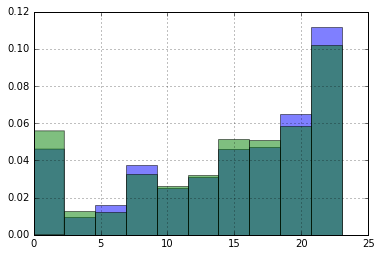

In [11]:
car_theft[date].dt.hour.hist(normed=True, alpha=.5)
car_prowl[date].dt.hour.hist(normed=True, alpha=.5)

In [12]:
shoplifting = df[df[crime_type] == 'SHOPLIFTING']

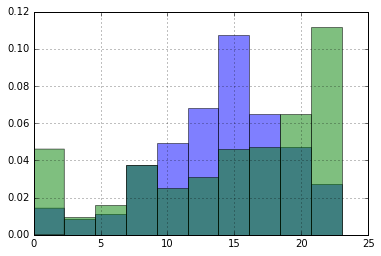

In [13]:
shoplifting[date].dt.hour.hist(normed=True, alpha=0.5)
car_theft[date].dt.hour.hist(normed=True, alpha=0.5)

In [14]:
shoplifting['District/Sector'].value_counts(normalize=True)

M    0.119703
K    0.105932
U    0.098517
N    0.078390
B    0.075212
G    0.061441
E    0.059322
L    0.058263
S    0.052966
F    0.048729
D    0.047669
R    0.045551
Q    0.045551
J    0.034958
W    0.030720
O    0.021186
C    0.015890
Name: District/Sector, dtype: float64

In [15]:
car_theft['District/Sector'].value_counts(normalize=True)

J     0.114202
B     0.101767
N     0.096204
L     0.089005
U     0.081806
F     0.064463
Q     0.063809
R     0.056937
C     0.054319
S     0.048757
D     0.044175
O     0.040249
W     0.038940
E     0.036649
G     0.031414
K     0.020288
M     0.014725
99    0.002291
Name: District/Sector, dtype: float64

In [18]:
subset = df[df[crime_type].isin(['VEHICLE THEFT', 'SHOPLIFTING'])]

In [20]:
subset

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
40,30359,201538550,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,02/03/2015 09:36:00 AM,2014-08-15 00:01:00,08/16/2014 12:00:00 AM,115XX BLOCK OF LAKE CITY WY NE,L,L1,700.2008,-122.299232,47.712517,"(47.712517105, -122.299232335)",8,2014
119,1084513,2014364905,X,69,VEH-RCVD-FOR OTHER AGENCY,X,VEHICLE THEFT,10/31/2014 03:22:00 PM,2014-07-30 12:00:00,NaN,133XX BLOCK OF LAKE CITY WY NE,L,L1,100.3003,-122.292379,47.725587,"(47.725586602, -122.292378848)",7,2014
122,1079668,2014361278,2404,4,VEH-THEFT-MTRCYCLE,2400,VEHICLE THEFT,10/28/2014 04:25:00 PM,2014-07-30 00:00:00,08/24/2014 11:59:00 PM,32XX BLOCK OF 21 AV W,Q,Q1,5801.1007,-122.383362,47.649392,"(47.649392409, -122.383361505)",7,2014
123,464105,2014361278,2404,4,VEH-THEFT-MTRCYCLE,2400,VEHICLE THEFT,10/28/2014 04:25:00 PM,2014-07-30 00:00:00,08/24/2014 11:59:00 PM,32XX BLOCK OF 21 AV W,Q,Q1,5801.1007,-122.383362,47.649392,"(47.649392409, -122.383361505)",7,2014
197,29110,2014338030,2404,7,VEH-THEFT-TRAILER,2400,VEHICLE THEFT,10/09/2014 12:33:00 PM,2014-07-25 11:00:00,07/29/2014 01:00:00 PM,63XX BLOCK OF 35 AV SW,W,W3,10600.1014,-122.376423,47.545593,"(47.54559328, -122.376422569)",7,2014
198,1071647,2014338030,2404,7,VEH-THEFT-TRAILER,2400,VEHICLE THEFT,10/09/2014 12:33:00 PM,2014-07-25 11:00:00,07/29/2014 01:00:00 PM,63XX BLOCK OF 35 AV SW,W,W3,10600.2000,-122.376423,47.545593,"(47.54559328, -122.376422569)",7,2014
257,1088775,2014326711,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,09/30/2014 07:48:00 AM,2014-07-16 00:00:00,NaN,16XX BLOCK OF 3 AV,M,M2,8100.2003,-122.339121,47.611201,"(47.611201035, -122.33912054)",7,2014
258,31086,2014326711,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,09/30/2014 07:48:00 AM,2014-07-16 00:00:00,NaN,16XX BLOCK OF 3 AV,M,M1,8100.2006,-122.339121,47.611201,"(47.611201035, -122.33912054)",7,2014
259,1077002,2014326711,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,09/30/2014 07:48:00 AM,2014-07-16 00:00:00,NaN,16XX BLOCK OF 3 AV,M,M2,8100.2003,-122.339121,47.611201,"(47.611201035, -122.33912054)",7,2014
270,1123945,2014325660,2404,8,VEH-THEFT-TRUCK,2400,VEHICLE THEFT,09/29/2014 10:21:00 AM,2014-07-17 00:00:00,NaN,16XX BLOCK OF 15 AV W,Q,Q2,5802.2010,-122.376139,47.634160,"(47.634160147, -122.376139109)",7,2014


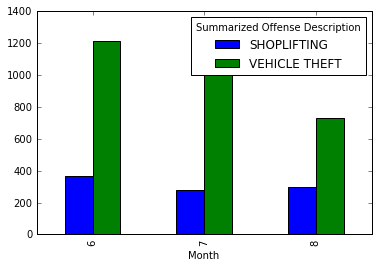

In [29]:
subset.groupby([crime_type, 'Month']).size().unstack().transpose().plot(kind='bar')

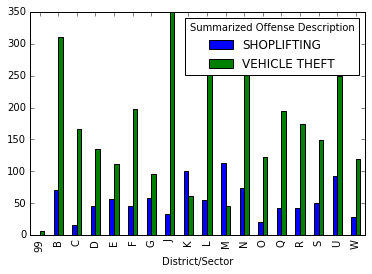

In [30]:
subset.groupby([crime_type, 'District/Sector']).size().unstack().transpose().plot(kind='bar')

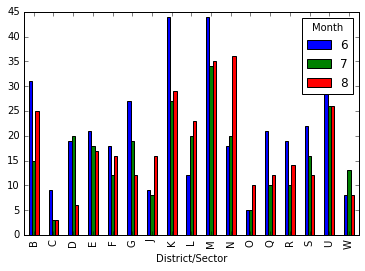

In [33]:
shoplifting.groupby(['Month', 'District/Sector']).size().unstack().transpose().plot(kind='bar')

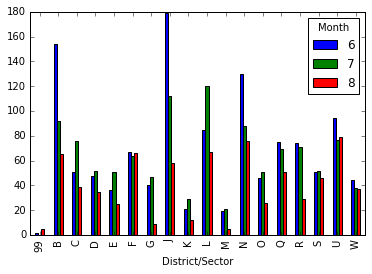

In [34]:
car_theft.groupby(['Month', 'District/Sector']).size().unstack().transpose().plot(kind='bar')

In [36]:
car_theft.sort_values(by=date)

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
32636,58265,2014172934,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,06/01/2014 05:15:00 PM,2014-06-01 00:01:00,06/01/2014 04:00:00 PM,100XX BLOCK OF 15 AV NE,L,L2,1200.1022,-122.312276,47.701704,"(47.701704351, -122.31227575)",6,2014
32635,999110,2014172934,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,06/01/2014 05:15:00 PM,2014-06-01 00:01:00,06/01/2014 04:00:00 PM,100XX BLOCK OF 15 AV NE,L,L2,1200.2009,-122.312276,47.701704,"(47.701704353, -122.312275751)",6,2014
32772,1041653,2014172067,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,06/01/2014 12:39:00 AM,2014-06-01 00:39:00,NaN,20 AV NW / NW MARKET ST,B,B2,4700.5015,-122.382131,47.668675,"(47.668675119, -122.382130513)",6,2014
32771,58289,2014172067,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,06/01/2014 12:39:00 AM,2014-06-01 00:39:00,NaN,20 AV NW / NW MARKET ST,B,B1,4700.4018,-122.382131,47.668675,"(47.668675119, -122.382130511)",6,2014
32728,991489,2014172297,X,69,VEH-RCVD-FOR OTHER AGENCY,X,VEHICLE THEFT,06/01/2014 07:55:00 AM,2014-06-01 01:13:00,NaN,5XX BLOCK OF NE 91 ST,U,U1,1900.2001,-122.321688,47.694948,"(47.694947895, -122.321688157)",6,2014
32748,58282,2014172206,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,06/01/2014 03:10:00 AM,2014-06-01 01:30:00,06/01/2014 03:00:00 AM,3 AV / YESLER WY,K,K3,8100.2045,-122.330267,47.601715,"(47.601714919, -122.33026735)",6,2014
32747,991501,2014172206,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,06/01/2014 03:10:00 AM,2014-06-01 01:30:00,06/01/2014 03:00:00 AM,3 AV / YESLER WY,K,K2,8100.2042,-122.330267,47.601715,"(47.601714919, -122.33026735)",6,2014
32706,58194,2014172539,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,06/01/2014 11:01:00 AM,2014-06-01 11:01:00,NaN,82XX BLOCK OF 23 AV NE,U,U1,2500.1003,-122.302699,47.689111,"(47.689111487, -122.302698947)",6,2014
32705,1079492,2014172539,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,06/01/2014 11:01:00 AM,2014-06-01 11:01:00,NaN,82XX BLOCK OF 23 AV NE,U,U1,2500.2001,-122.302699,47.689111,"(47.689111487, -122.302698947)",6,2014
31667,997206,2014176786,2404,1,VEH-THEFT-AUTO,2400,VEHICLE THEFT,06/04/2014 03:50:00 PM,2014-06-01 12:00:00,06/04/2014 03:40:00 PM,46XX BLOCK OF EASTERN AV N,J,J3,5100.1000,-122.329071,47.663801,"(47.663801106, -122.329070984)",6,2014


In [37]:
car_theft_ = car_theft.copy()

In [39]:
car_theft_ = car_theft_.set_index(date)

In [42]:
car_theft_ = car_theft_.sort_index()

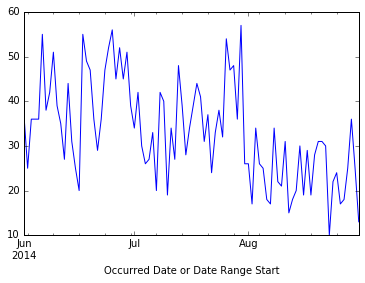

In [47]:
car_theft_.resample('1D').size().plot()

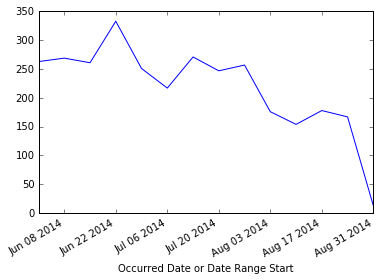

In [48]:
car_theft_.resample('7D').size().plot()

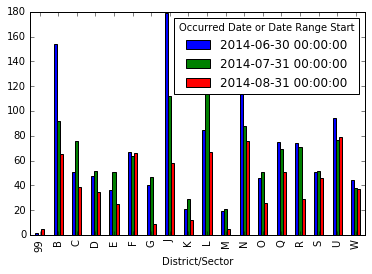

In [60]:
car_theft_.groupby([pd.TimeGrouper('1M'), 'District/Sector']).size().unstack().transpose().plot(kind='bar')

In [71]:
car_theft_['Hour'] = car_theft_.index.hour

In [80]:
x = car_theft_.groupby(['Hour', 'District/Sector']).size().unstack().transpose()

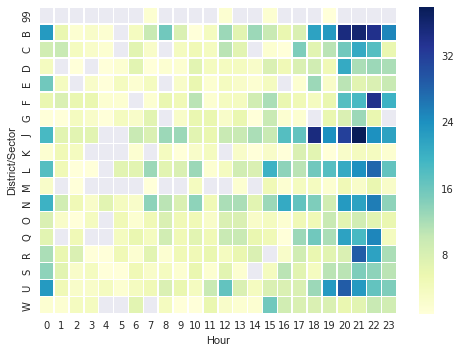

In [84]:
sns.heatmap(x, linewidths=.5, cmap="YlGnBu")